## Answer 1

As we are using a full batch gradient descent on the entire training set, the order will not matter because we are going through the entire dataset in every iteration. Also, the operations we perform are commutative and hence their order does not matter.<br>It is worth noting that the statement is not true for Stochastic Gradient Descent.

## Answer 2

In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [65]:
def MSE(y, X, theta):
    
    """
    Parameters:
    X: Numpy array of shape m x n+1(the dataset's features)
    y: Numpy array of shape m, (the values of the function at the points present in the dataset)
    theta: Numpy array of shape n+1, it has the parameters for the gradient descent function
    
    m: number of training data examples
    n: Number of features
    
    Returns:
    The method returns error(the training MSE for the dataset for the given value of theta)
    """

    m = y.shape[0]
    error = 0
    
    error = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    return error

In [69]:
def gradientDescent(X, y, theta, alpha, n):
    """
    Parameters:
    X, y and theta are same as defined for the MSE method.
    alpha is the learning rate
    n is the number of iterations for which we will run the Gradient Descent method.
    
    Returns:
    theta (The learned value of theta after linear regression) (Type: numpy array)
    historyOfMSE (The value of MSE after every iteration) (Type: python list)
    """
    m = y.shape[0]
       
    theta = theta.copy() #As we do not want to change the value of the theta passed as the paramter to the function. 
    
    historyOfMSE = [] 
        
    for i in range(n):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        historyOfMSE.append(MSE(X,y,theta))
        
    return historyOfMSE, theta

Final value of theta is:	 [0.04641167 0.04760109]
Final value of theta is:	 [0.17407314 0.19865745]
Final value of theta is:	 [0.24868781 0.3275524 ]
Final value of theta is:	 [0.06622182 0.89284879]


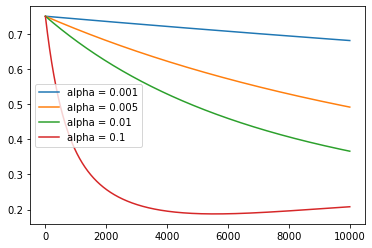

In [122]:
"""
Test1:
Dataset:
X = [[1,0],[1,1]]
y = [0,1]
We will take a random initial theta

Expected theta(final) is [0,1]
"""
X1 = np.array([[1,0],[1,1]], dtype = 'float')
y1 = np.array([0,1], dtype = 'float')

theta1 = np.array([0,0])
iters1 = 10000
alpha1 = 0.00001


history1, thetaF1 = gradientDescent(X1, y1, theta1, alpha1, iters1)
history2, thetaF2 = gradientDescent(X1, y1, theta1, alpha1*5, iters1)
history3, thetaF3 = gradientDescent(X1, y1, theta1, alpha1*10, iters1)
history4, thetaF4 = gradientDescent(X1, y1, theta1, alpha1*100, iters1)

print("Final value of theta is:\t",thetaF1)
print("Final value of theta is:\t",thetaF2)
print("Final value of theta is:\t",thetaF3)
print("Final value of theta is:\t",thetaF4)

plt.plot(history1,label = "alpha = 0.001")
plt.plot(history2,label = "alpha = 0.005")
plt.plot(history3,label = "alpha = 0.01")
plt.plot(history4,label = "alpha = 0.1")

plt.legend()

If the learning rate is too large, MSE can diverge and even ‘blow up’, resulting in values which are too large for computer calculations(produces NaN in Numpy). In these situations, one should reduce the learning rate.<br>
A minimum number of iterations are required to reach the optimal value of theta.

## Answer 3

$$ E(y_{o} - \hat{f}(x_{o}))^{2} = Var(\hat{f}(x_{o})) + [Bias(\hat{f}(x_{o}))]^{2} + Var(\xi) $$ 
***
Bias: It is the error introduced when one attempts to approximate a complicated function with a relatively simpler one. The bias decreases with increase in the flexibility of the function.(Basically how good is the function on the training data)<br>
Variance: It refers to the amount by which f will change upon changing the training dataset.(Basically how much the function depends on every single variable on the training data)
***
In a training dataset, as the flexibility is increased, the function tries to mimic the behaviour of the test data as closely as possible therefore reducing the bias but this also results in it finding patterns and relationships which actually don't exist and hence increases the variance. So while choosing the correct function to use on the data type one needs to optimise the flexibility such that total of variance and bias is minimised. This effect of flexibility on the accuracy of the model is known as the Bias Variance tradeoff.